In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

# from tensorflow.keras.datasets import fashion_mnist

# (x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

print(tf.__version__)

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(1234)
tf.random.set_seed(1234)


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]
2.12.0


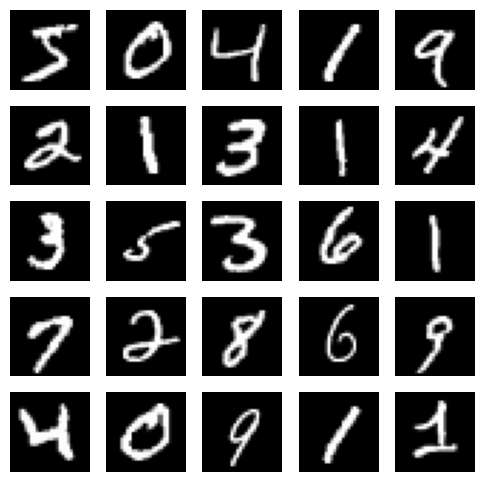

In [3]:

import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

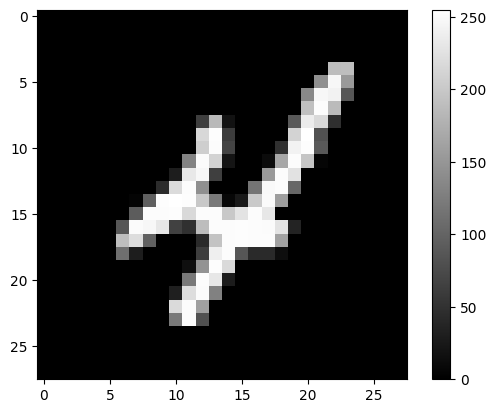

In [4]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

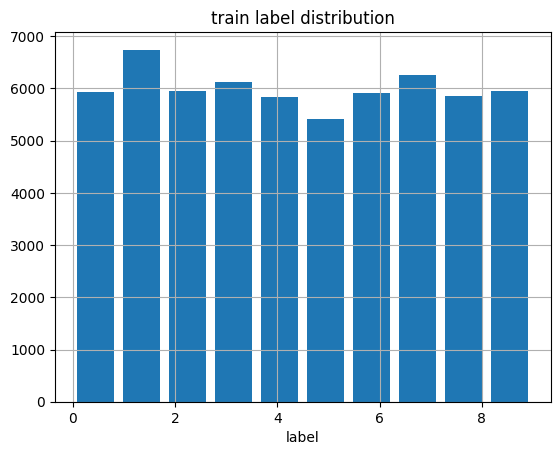

In [5]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [6]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]


# to_categorical() 함수
- 케라스(Keras)의 to_categorical() 함수는 정수형(integer) 클래스 레이블(label)을 원-핫 인코딩(one-hot encoding) 벡터로 변환하는 함수입니다.

<pre>
from keras.utils import to_categorical

labels = [0, 1, 2, 1, 0]
one_hot_labels = to_categorical(labels, num_classes=3)

print(one_hot_labels)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]</pre>

In [7]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = x_train / 255.0
x_test = x_test / 255.0
# x_train = (x_train - 0.0) / (255.0 - 0.0)
# x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 (One-Hot Encoding)
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))   

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 - 3s - loss: 0.3192 - accuracy: 0.9097 - val_loss: 0.1960 - val_accuracy: 0.9440
Epoch 2/30
42000/42000 - 3s - loss: 0.1479 - accuracy: 0.9569 - val_loss: 0.1474 - val_accuracy: 0.9565
Epoch 3/30
42000/42000 - 3s - loss: 0.1022 - accuracy: 0.9700 - val_loss: 0.1282 - val_accuracy: 0.9623
Epoch 4/30
42000/42000 - 3s - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.1169 - val_accuracy: 0.9667
Epoch 5/30
42000/42000 - 3s - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.1081 - val_accuracy: 0.9681
Epoch 6/30
42000/42000 - 3s - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.1046 - val_accuracy: 0.9694
Epoch 7/30
42000/42000 - 3s - loss: 0.0388 - accuracy: 0.9885 - val_loss: 0.1124 - val_accuracy: 0.9661
Epoch 8/30
42000/42000 - 3s - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.1050 - val_accuracy: 0.9709
Epoch 9/30
42000/42000 - 3s - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.1084 - val_accuracy: 0.9697
Epoch 10/30
42

In [11]:
model.evaluate(x_test, t_test, verbose=2)

10000/1 - 0s - loss: 0.0625 - accuracy: 0.9771


[0.12498885289936151, 0.9771]

In [12]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,0.319222,0.909714,0.196017,0.944000
1,0.147941,0.956881,0.147404,0.956500
2,0.102194,0.970024,0.128183,0.962278
3,0.077826,0.976500,0.116936,0.966722
4,0.059337,0.982310,0.108064,0.968111
5,0.048934,0.984690,0.104558,0.969389
6,0.038798,0.988500,0.112382,0.966111
7,0.031470,0.990714,0.104950,0.970944
8,0.024855,0.992786,0.108391,0.969667
9,0.022296,0.993357,0.104823,0.972778


### [Matplotlib 눈금 표시하기](https://wikidocs.net/92089)

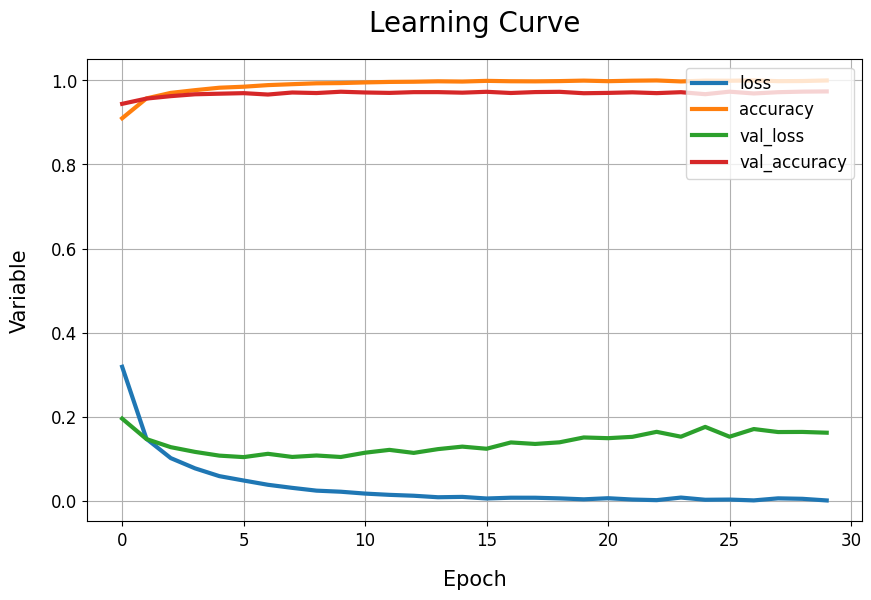

In [13]:
history_DF.plot(figsize=(10,6), linewidth=3)
plt.grid(True)
plt.legend(loc="upper right", fontsize=12)
plt.title("Learning Curve", fontsize=20, pad=20)
plt.xlabel('Epoch', fontsize=15, loc='center',labelpad=15)
plt.ylabel('Variable', fontsize=15, rotation=90, loc='center', labelpad=15)
plt.tick_params(axis='both', labelsize=12)
# plt.tick_params(axis='y', labelsize=15)

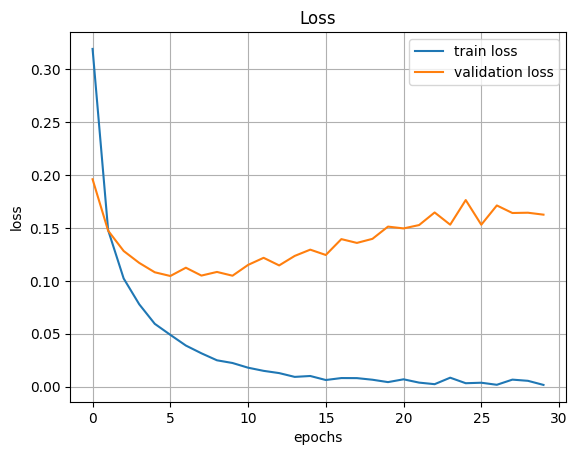

In [14]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

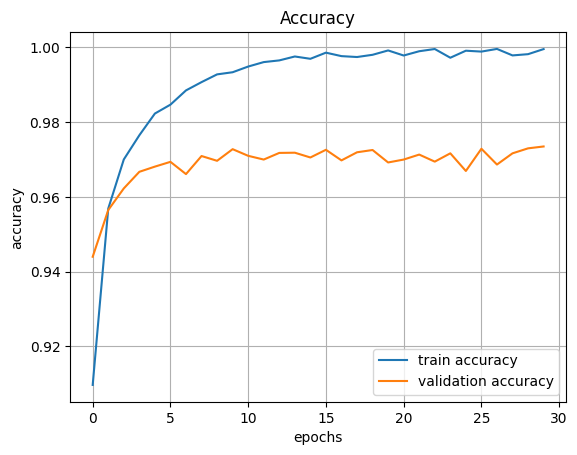

In [15]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

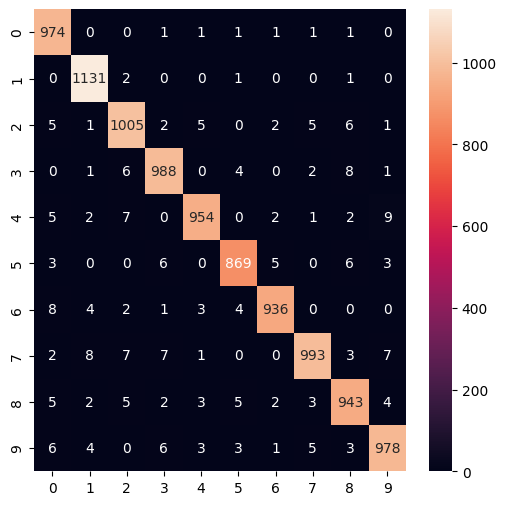

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [17]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[ 974    0    0    1    1    1    1    1    1    0]
 [   0 1131    2    0    0    1    0    0    1    0]
 [   5    1 1005    2    5    0    2    5    6    1]
 [   0    1    6  988    0    4    0    2    8    1]
 [   5    2    7    0  954    0    2    1    2    9]
 [   3    0    0    6    0  869    5    0    6    3]
 [   8    4    2    1    3    4  936    0    0    0]
 [   2    8    7    7    1    0    0  993    3    7]
 [   5    2    5    2    3    5    2    3  943    4]
 [   6    4    0    6    3    3    1    5    3  978]]


label = 0	(974/980)	accuracy = 0.994
label = 1	(1131/1135)	accuracy = 0.996
label = 2	(1005/1032)	accuracy = 0.974
label = 3	(988/1010)	accuracy = 0.978
label = 4	(954/982)	accuracy = 0.971
label = 5	(869/892)	accuracy = 0.974
label = 6	(936/958)	accuracy = 0.977
label = 7	(993/1028)	accuracy = 0.966
label = 8	(943/974)	accuracy = 0.968
label = 9	(978/1009)	accuracy = 0.969


In [18]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

print(predicted_value.shape)
for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

(10000, 10)
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
[1008. 1153. 1034. 1013.  970.  887.  949. 1010.  973. 1003.]
